# **Emergency Vehicle Detection Training**



## Install

In [ ]:
!pip install tensorflow==2.1.0

## Import Libraries

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.1.0'

## Setup Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
tpath =  "/content/gdrive/My Drive/Academic/Vehicle/Dataset/Train"
vpath =  "/content/gdrive/My Drive/Academic/Vehicle/Dataset/Validation"

## Train

#### Initializing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    tpath,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    vpath,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='binary')

Found 1782 images belonging to 2 classes.
Found 425 images belonging to 2 classes.


#### Model

In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'],
)

#### Training the Model

In [ ]:
batch_size = 32
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, workers=4,
validation_data=validation_generator, validation_steps=validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 55 steps, validate for 13 steps
Epoch 1/10
55/55 [==============================] - 456s 8s/step - loss: 0.7812 - accuracy: 0.5857 - val_loss: 0.6802 - val_accuracy: 0.5913
Epoch 2/10
55/55 [==============================] - 27s 484ms/step - loss: 0.6110 - accuracy: 0.6600 - val_loss: 0.5804 - val_accuracy: 0.7188
Epoch 3/10
55/55 [==============================] - 28s 501ms/step - loss: 0.4903 - accuracy: 0.7537 - val_loss: 0.4592 - val_accuracy: 0.7716
Epoch 4/10
55/55 [==============================] - 28s 509ms/step - loss: 0.4328 - accuracy: 0.8097 - val_loss: 0.4456 - val_accuracy: 0.7957
Epoch 5/10
55/55 [==============================] - 28s 512ms/step - loss: 0.4015 - accuracy: 0.8246 - val_loss: 0.3984 - val_accuracy: 0.8389
Epoch 6/10
55/55 [==============================] - 28s 504ms/step - loss: 0.3912 - accuracy: 0.8383 - val_loss: 0.3988

## Metrics

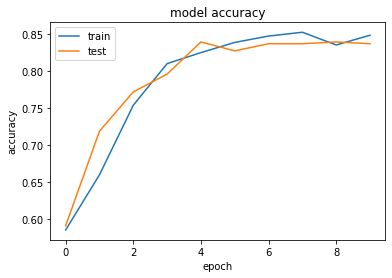

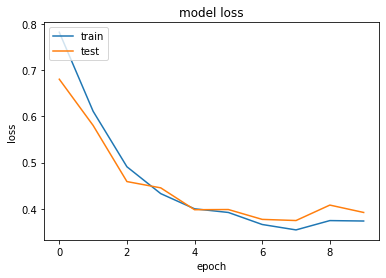

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save the Model

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/My Drive/Academic/Vehicle/Dataset/Allen2.h5')